In [21]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
from sklearn import ensemble, cross_validation, learning_curve, metrics,tree
from sklearn.datasets import load_digits
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
digits = load_digits()

In [3]:
X = digits.data
y = digits.target
count_features = int(X.shape[1]**0.5)
count_features

8

In [4]:
%%time
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)
answer1 = cross_validation.cross_val_score(clf,X,y,cv=10).mean()
print("Ответ на первый вопрос: ", answer1)

Ответ на первый вопрос:  0.834244524323
CPU times: user 217 ms, sys: 6.6 ms, total: 224 ms
Wall time: 228 ms


In [5]:
def write_answer(string, answer):
    with open(string, "w") as fout:
        fout.write(str(answer))
write_answer("answer_one.txt", answer1)

In [6]:
%%time
clf = ensemble.BaggingClassifier(n_estimators=100)
clf.fit(X,y)
answer2 = cross_validation.cross_val_score(clf,X,y,cv=10).mean()
print("Ответ на второй вопрос: ", answer2)

Ответ на второй вопрос:  0.924932941749
CPU times: user 13.6 s, sys: 104 ms, total: 13.7 s
Wall time: 13.8 s


In [7]:
write_answer("answer_two.txt", answer2)

In [8]:
%%time
clf = ensemble.BaggingClassifier(n_estimators=100,max_features=count_features)
clf.fit(X,y)
answer3 = cross_validation.cross_val_score(clf,X,y,cv=10).mean()
print("Ответ на третий вопрос: ", answer3)

Ответ на третий вопрос:  0.931609182967
CPU times: user 3.53 s, sys: 41.1 ms, total: 3.58 s
Wall time: 3.62 s


In [9]:
write_answer("answer_three.txt", answer3)

In [10]:
%%time
clf = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_features=count_features),n_estimators=100)
clf.fit(X,y)
answer4 = cross_validation.cross_val_score(clf,X,y,cv=10).mean()
print("Ответ на four вопрос: ", answer4)

Ответ на four вопрос:  0.950071932333
CPU times: user 3.91 s, sys: 47.4 ms, total: 3.96 s
Wall time: 4.01 s


In [11]:
write_answer("answer_four.txt", answer4)

In [12]:
%%time
clf = ensemble.RandomForestClassifier(n_estimators=100)
clf.fit(X,y)
answer5 = cross_validation.cross_val_score(clf,X,y,cv=10).mean()
print("Ответ на пятый вопрос: ", answer5)

Ответ на пятый вопрос:  0.950532804126
CPU times: user 3.27 s, sys: 30.4 ms, total: 3.3 s
Wall time: 3.34 s


In [13]:
write_answer("answer_five.txt", answer5)

In [33]:
param_grid ={
    'n_estimators': np.linspace(20, 200, 10, dtype=int),
    'max_features': np.linspace(2, 30, 15, dtype=int),
    'max_depth' : np.linspace(1, 110, 4, dtype=int),
}

param_grid

{'max_depth': array([  1,  37,  73, 110]),
 'max_features': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]),
 'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200])}

In [15]:
%%time
#Анализ алгоритма при изменении количества деревьев
cross_val_cnt_trees = []
for n_estimator in param_grid['n_estimators']:
    clf = ensemble.RandomForestClassifier(n_estimators=n_estimator, max_features=count_features)
    clf.fit(X, y)
    cross_val_cnt_trees.append( cross_validation.cross_val_score(clf, X, y, cv=10).mean() )
print(cross_val_cnt_trees)

[0.94442132477322072, 0.94777258799852881, 0.94832827908819706, 0.95444088683484163, 0.95103639005014651, 0.94941545081740109, 0.95053877128540287, 0.9539280174639625, 0.95387906172592252, 0.95277968522677514]
CPU times: user 35.7 s, sys: 280 ms, total: 36 s
Wall time: 36.3 s


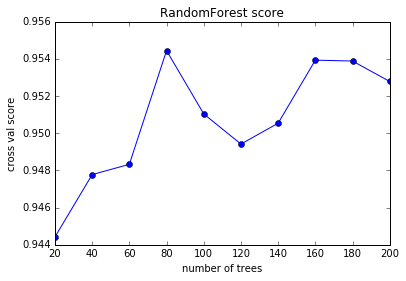

In [26]:
plt.plot(param_grid['n_estimators'], cross_val_cnt_trees, 'b-o')
plt.xlabel('number of trees')
plt.ylabel('cross val score')
plt.title('RandomForest score')


In [27]:
%%time
#Анализ алгоритма при изменении количества фич
cross_val_cnt_trees = []
for max_features in param_grid['max_features']:
    clf = ensemble.RandomForestClassifier(n_estimators=100, max_features=max_features)
    clf.fit(X, y)
    cross_val_cnt_trees.append( cross_validation.cross_val_score(clf, X, y, cv=10).mean() )
print(cross_val_cnt_trees)

[0.95336964342923824, 0.9551163065557734, 0.9544519216094306, 0.94994639959041527, 0.95056715777170209, 0.95112059003151417, 0.95443256554406752, 0.94886623150874061, 0.94883771327336353, 0.94834674408362873, 0.94718598470006476, 0.94826918905039381, 0.94660873267748058, 0.94602557529077946, 0.94659122943106822]
CPU times: user 1min 9s, sys: 778 ms, total: 1min 10s
Wall time: 1min 11s


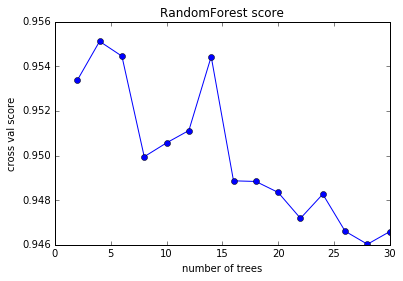

In [28]:
plt.plot(param_grid['max_features'], cross_val_cnt_trees, 'b-o')
plt.xlabel('number of trees')
plt.ylabel('cross val score')
plt.title('RandomForest score')

In [36]:
%%time
#Анализ алгоритма при изменении глубины дерева
cross_val_depth = []
for depth in param_grid['max_depth']:
    clf = ensemble.RandomForestClassifier(n_estimators=100, max_features=count_features, max_depth=depth)
    clf.fit(X, y)
    cross_val_depth.append( cross_validation.cross_val_score(clf, X, y, cv=10).mean() )

CPU times: user 11 s, sys: 116 ms, total: 11.1 s
Wall time: 11.3 s


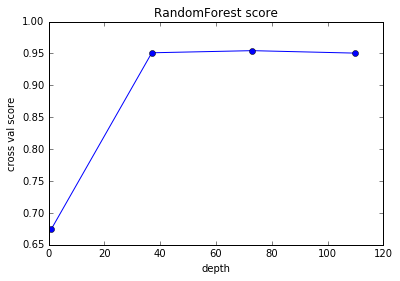

In [37]:
plt.plot(param_grid['max_depth'], cross_val_depth, 'b-o')
plt.xlabel('depth')
plt.ylabel('cross val score')
plt.title('RandomForest score')

In [18]:
write_answer("answer_six.txt", "2 3 4 7")